In [126]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

## Notes Prior to Starting this Document

There are a few things in here that we will fill in the details for later, including:
<ul>
<li> Extrapolation. 
<li> Time based datasets (time series)
<li> Smoother pmf/histogram plots. 
<li> <b>Using</b> models created from our data. 
</ul>

Here we are mainly looking to see an exponential distribution in the format it will normally be seen in, and translate that real world scenario to a statistical model. 

Also, the  textbook examples show some data that is more tightly fitted to the theoretical models. These examples are intended to illustrate with real data, which sometimes doesn't fit; personally, I think dealing with the issues that may arrise with imperfect real data is good preparation in handling weird things that pop up. We <b>can</b> find or generate data that is a perfect or near perfect match to our theoretical distributions, for some people the direct match may be more illustrative; if you want to see examples like this, let me know, we can do them; more simple examples may be able to be made on the fly, more complex ones require a heads up. 

## 開始本文檔之前的注意事項

這裡有一些內容我們將在稍後填寫詳細信息，包括：
<ul>
<li> 外推。
<li> 基於時間的數據集（時間序列）
<li> 更平滑的 pmf/直方圖。
<li> <b>使用</b>根據我們的數據創建的模型。
</ul>

在這裡，我們主要希望以通常會看到的格式查看指數分佈，並將該真實世界場景轉換為統計模型。

此外，教科書示例顯示了一些更符合理論模型的數據。 

這些例子旨在用真實數據來說明，有時並不合適； 就個人而言，我認為處理不完美的真實數據可能出現的問題是處理突然出現的奇怪事情的良好準備。 

我們<b>可以</b>找到或生成與我們的理論分佈完美或接近完美匹配的數據，對於某些人來說，直接匹配可能更能說明問題； 

如果你想看到這樣的例子，請告訴我，我們可以做到； 更簡單的例子可以即時製作，更複雜的例子需要注意。


# Distributions

We looked at histograms, pmf, and cdf charts to get an idea of the distribution of our data - or how it is spread out over the range. Are most values clustered together closely? Are values fairly evenly spread out? Are there patterns? Outliers? Clusters?

Everything we've dealt with thus far has been emperical - i.e. we've taken actual data, and looked at the shape of that data to see the (actual, real life) distribution. This inheirently depends on collecting some data, and looking at it - this real world aspect has some limitations, you need to have actual data collected.  

Now we're going to look at analytical distributions - mathmatical models that represent a distribution. Analytical distributions allow us to look at/analyze/calculate things without having to collect all that data - we can use the mathmatical formula as a siplified representation of what we would expect to find if we did collect the data.

In many cases the model can pretty accurately represent the real data, and we can use the simple model to do analysis and make predictions, having faith that the data will closely mirror our calculations.

The most common and well know example of this the the normal distribution or bell curve. We can use this model to analyze may distributions we see in real life - the heights, home prices, etc from the demonstrations tend to look a lot like bell curves, as do many things in real life. 

# 分佈

我們查看了直方圖、pmf 和 cdf 圖表以了解我們的數據分佈 - 或者它是如何分佈在整個範圍內的。 

大多數價值是否緊密地聚集在一起？ 價值分佈是否相當均勻？ 有圖案嗎？ 異常值？ 集群？

到目前為止，我們處理的所有事情都是經驗主義的——也就是說，我們已經獲取了實際數據，並查看了該數據的形狀以了解（實際的、真實的）分佈。 

這本質上取決於收集一些數據並查看它 - 這個現實世界方面有一些局限性，您需要收集實際數據。


現在我們來看看分析分佈——代表分佈的數學模型。 

分析分佈使我們能夠在不必收集所有數據的情況下查看/分析/計算事物 - 我們可以使用數學公式作為我們在收集數據時期望找到的內容的簡化表示。

在許多情況下，模型可以非常準確地代表真實數據，我們可以使用簡單的模型進行分析和預測，相信數據將密切反映我們的計算。

最常見和眾所周知的例子是正態分佈或鐘形曲線。 

我們可以使用這個模型來分析我們在現實生活中看到的分佈——演示中的高度、房價等往往看起來很像鐘形曲線，就像現實生活中的許多事情一樣。

Our goal for this one is to get a model that models (part of) COVID growth!

![A](images/163819.jpg)

In [127]:
#Load some Covid Data
#Note the sep thing - that tells Pandas that the separator is a semi-colon. This is just weird data.
#In theory, the separator could be anything (it is usually a comma), just use this if it is
df = pd.read_csv("data/full_data_2.csv", sep=";")
df.head()

,Time,Infections
0,23/01/2020,1
1,24/01/2020,1
2,25/01/2020,2
3,26/01/2020,2
4,27/01/2020,5


In [128]:
#I'm going to add a "Day Number" value. This just makes it easier than using dates.
#Note: you could write a function to translate days to dates...
#The command to do this is just a Google result "dataframe add running number". 
# I add 1 to avoid a log(0) scenario. 
df["Day"] = np.arange(len(df))
df["Day"] = df["Day"].apply(lambda x: x+ 1)
df.drop([52,53], inplace=True)
df.tail()

,Time,Infections,Day
47,10/03/2020,472,48
48,11/03/2020,696,49
49,12/03/2020,987,50
50,13/03/2020,1264,51
51,14/03/2020,1678,52


Text(0.5, 1.0, 'COVID Gonna Give It To Ya')

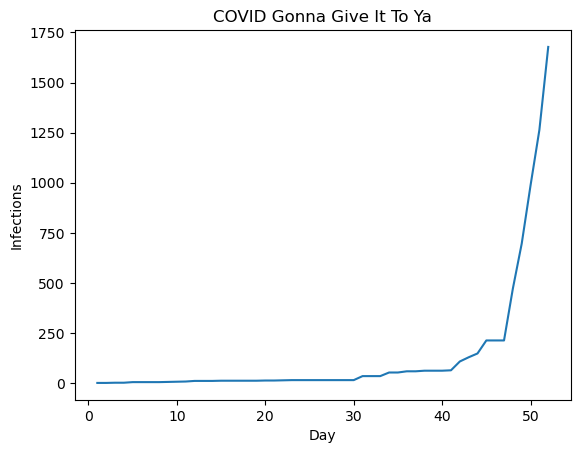

In [129]:
#Look at the growth!
sns.lineplot(data = df, x = "Day", y = "Infections")

plt.title('COVID Gonna Give It To Ya')

Text(0.5, 1.0, 'COVID Gonna Give It To Ya')

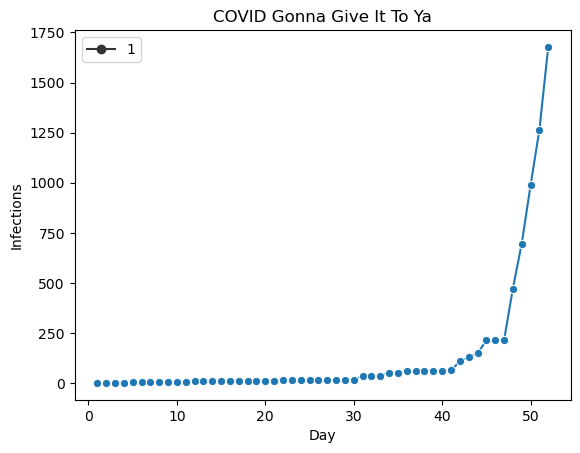

In [130]:
# With points!
sns.lineplot(data = df, x = "Day", y = "Infections", style = 1, markers = True)
plt.title('COVID Gonna Give It To Ya')

### CDF to See Distribution

This certainly looks like exponential growth. 

What we are looking at there ISN'T a distribution though, this is a scatter plot (we'll look at this soon) that shows two variables, time and infections. Distributions show one variable at a time, in this case, just infections. We can focus our attention to the infections data. 

<b>For exponential distributions this type of thing is common, we are so used to look at them mapped against time, that we don't consider time as a separate variable. In the normal stuff we didn't have to do this separation as each variable is "more separate" as compared to the time/count graph we normally get for time.</b>

We can make a CDF of our exponential distribution, and see if it matches our expectations...

### CDF 查看分佈

這當然看起來像指數增長。

我們在那裡看到的不是分佈，而是一個散點圖（我們很快就會看到），它顯示了兩個變量，時間和感染。 

分佈一次顯示一個變量，在這種情況下，僅顯示感染。 我們可以將注意力集中在感染數據上。

<b>對於指數分佈，這種情況很常見，我們習慣於將它們映射到時間上，以至於我們不會將時間視為一個單獨的變量。 

在正常情況下，我們不必進行這種分離，因為與我們通常獲得的時間/計數圖相比，每個變量都“更加獨立”。</b>

我們可以為我們的指數分佈製作一個 CDF，看看它是否符合我們的預期……

{'xscale': 'linear', 'yscale': 'linear'}

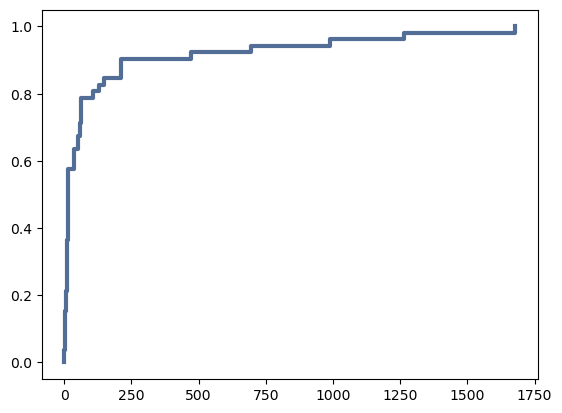

In [131]:
# CDF
inf_cdf = thinkstats2.Cdf(df["Infections"])
thinkplot.Cdf(inf_cdf)

Or with the sns version. The ecdf plot is a cummulative distribution plot from seaborn, to find it I Googled "seaborn cummulative distribution" and the documentation page was the first link. There are examples near the bottom that I could adapt. Copy and adjust - borrowing and tweaking code that is similar to what you want is good, efficient if you have semi-repetitive or standardized tasks (like data analysis in places), aren't able to code things off the top of your head, or are learning to tackle new problems. (Near) plagarism is desired. 

ecdf 圖是 seaborn 的累積分佈圖，為了找到它，我在谷歌上搜索了“seaborn 累積分佈”，文檔頁面是第一個鏈接。 

在底部附近有一些我可以改編的例子。 複製和調整——借用和調整與你想要的相似的代碼是好的，如果你有半重複或標準化的任務（如地方數據分析），

則效率很高，無法將代碼放在頭頂， 或者正在學習解決新問題。 （近）剽竊是可取的。

<AxesSubplot:xlabel='Infections', ylabel='Proportion'>

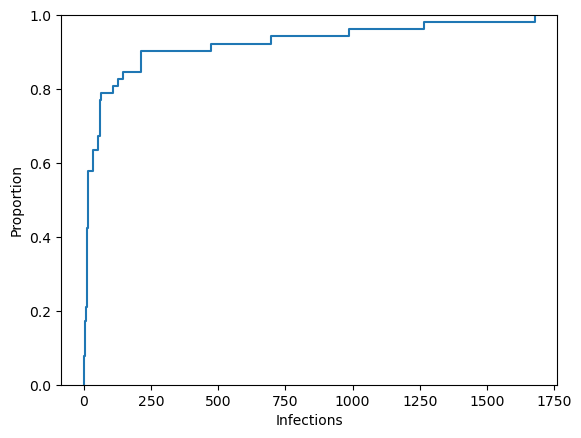

In [132]:
# CDF from seaborn
sns.ecdfplot(data=df["Infections"])

We can look at an actual CDF of an analytical distribution. The scale here is the standard deviation and the loc is the mean - sometimes scipy uses different names, and aren't that clear in the documentation. 

我們可以查看分析分佈的實際 CDF。 

這裡的比例是標準偏差，loc 是平均值——有時 scipy 使用不同的名稱，並且在文檔中不是那麼清楚。

<AxesSubplot:ylabel='Proportion'>

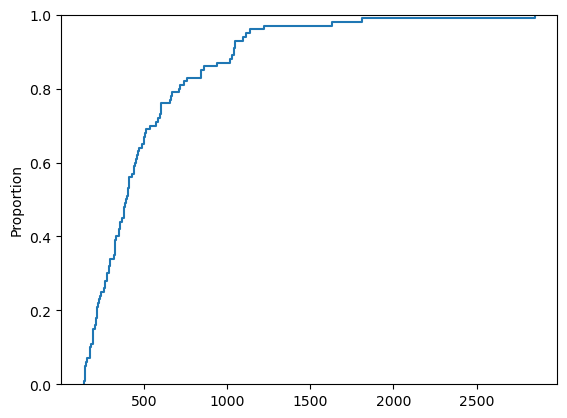

In [133]:
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(df["Infections"]), loc=np.mean(df["Infections"])))

All together now...

<AxesSubplot:ylabel='Proportion'>

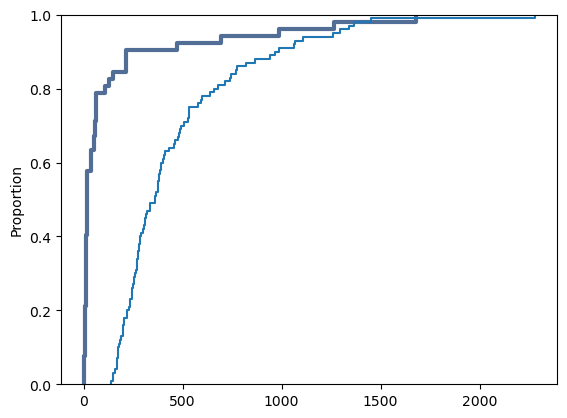

In [134]:
# CDF and CDF from seaborn
inf_cdf = thinkstats2.Cdf(df["Infections"])
thinkplot.Cdf(inf_cdf)
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(df["Infections"]), loc=np.mean(df["Infections"])))

And if we look at the PMF to see the "normal" distribution. 

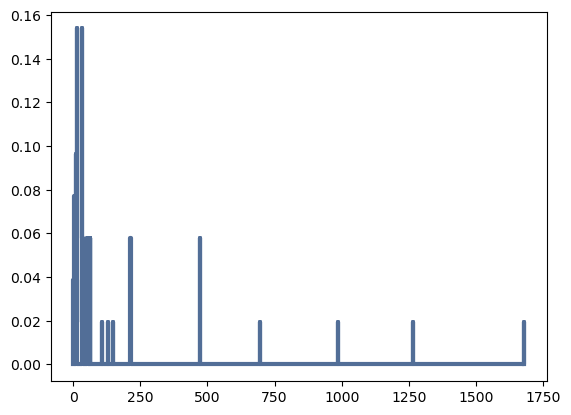

In [135]:
# it is a graph from a distribution, but not very useful.
inf_pmf = thinkstats2.Pmf(df["Infections"])
thinkplot.Pmf(inf_pmf)

##### ....Ugh... Not Spectacular

This is an illustration of one of the reasons that CDFs can be useful in comparing distributions. We can break it down:
<ul>
<li> If we look back up to the line plots, as we look towards the right side of the chart, in the climb, we obviously aren't taking on every value. One of exponential growth's things is jumping quickly. 
<li> Those values that are skipped, aren't in the distribution, so if we plot them on a histogram, or in this case - a PMF, there's nothing there, as they never occur. 
<li> A cummulative distribution doesn't have the same impact from this, the flat parts of the cummulative graph correspond to the zero parts of the PMF. In the CDF though, the pattern of the distribution just becomes somewhat more blocky, but maintains the same basic shape. 
    <ul>
    <li> Binning also addresses this, but if we look at the actual value for number of infections, try to think of a bin size that makes sense for this situation. Test a few
    </ul>
</ul>

So this CDF comparison is another tool in our toolkit - we don't need to use it, but when it does the job better, then we should. 

We'll also have different tools to deal with plotting distribution data soon. 

這說明了 CDF 可用於比較分佈的原因之一。 我們可以分解一下：
<ul>
<li> 如果我們回頭看看線圖，當我們看向圖表的右側時，

在攀升過程中，我們顯然沒有考慮到每個值。 指數增長的其中一件事是快速跳躍。

<li> 那些被跳過的值不在分佈中，因此如果我們將它們繪製在直方圖上，

或者在這種情況下 - PMF，那裡什麼也沒有，因為它們從未發生過。

<li> 累積分佈不會產生相同的影響，累積圖的平坦部分對應於 PMF 的零部分。 

但在 CDF 中，分佈模式變得更加塊狀，但保持相同的基本形狀。
     <ul>
     <li> 分箱也解決了這個問題，但是如果我們查看感染數量的實際值，
     
     請嘗試考慮對這種情況有意義的分箱大小。 測試幾個
     </ul>
</ul>

所以這個 CDF 比較是我們工具包中的另一個工具——我們不需要使用它，

但是當它做得更好時，我們應該使用它。

我們也將很快有不同的工具來處理繪製分佈數據。

### Exponential Distributions

The data looks like it shows an exponential distribution, more or less, and a steeply distributed one at that. Just like with the normal distribution that we can almost always eyeball against a histogram or pmf, this exponential distribution is pretty easy to pattern via the CDF. Each method is valid, it depends on the situation. 

### 指數分佈

數據看起來或多或少呈指數分佈，而且呈陡峭分佈。 

就像我們幾乎總能看到直方圖或 pmf 的正態分佈一樣，這種指數分佈很容易通過 CDF 進行模式化。 

每種方法都有效，這取決於情況。

## Exercise - Part #1

Use this data to:
<ul>
<li> Generate a CDF for the emperical data. 
<li> Generate a CDF for the equivalent analytical distribution.
<li> Do they seem to match? 
</ul>

In [136]:
ex = pd.read_csv("data/expon.csv")
ex.head()

,Index,Value
0,0.0,78.017083
1,1.0,78.018832
2,2.0,78.024334
3,3.0,78.034055
4,4.0,78.049468


c:\Users\Elsa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Proportion'>

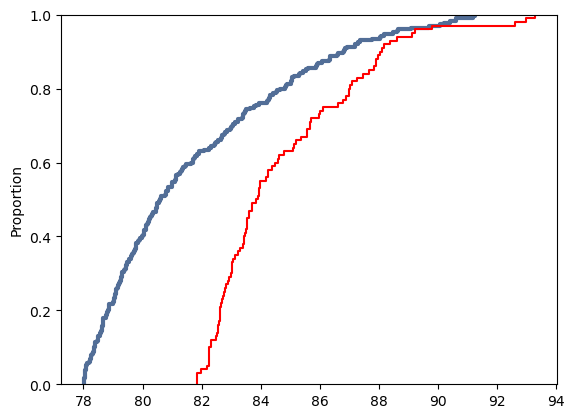

In [151]:
# graphical comparison
ex_cdf = thinkstats2.Cdf(ex["Value"])
thinkplot.Cdf(ex_cdf)

ex_mean = np.mean(ex)
ex_std = np.std(ex)
sns.ecdfplot(scipy.stats.expon.rvs(size=100, scale=np.std(ex["Value"]), loc=np.mean(ex["Value"])), color="red")

c:\Users\Elsa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:ylabel='Proportion'>

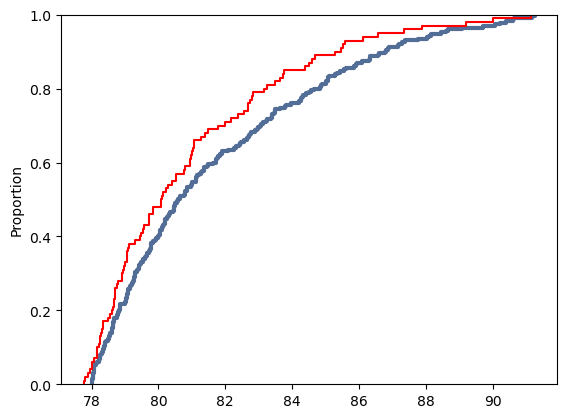

In [153]:
# graphical comparison
ex_cdf = thinkstats2.Cdf(ex["Value"])
thinkplot.Cdf(ex_cdf)

ex_mean = np.mean(ex)
ex_std = np.std(ex)
sns.ecdfplot(scipy.stats.expon.rvs(size=100, scale=np.std(ex["Value"]), loc=np.mean(ex["Value"])-4), color="red")

## Transformations - A Brief and Gentle Introduction

One other thing we can do to match analytical distributions is to use <b>transformations</b> to make the data easier to deal with. Transformations are simply things that we can do to change, or transform, our data into a more usable format. This is common is some situations because certain things are just easier if the data is changed, particularly if it is changed into a known distribution later on. 

### Axis Scaling

Looks pretty exponential! 

What if we were to make the y axis into a logarithmic scale. Why?
<ul>
The original formula is y = s * b^x:
    <ul>
    <li>y = # infections
    <li>s = initial number of people infected
    <li>b = infections generated per infected person. (Growth Rate)
    <li>x = days in
    </ul>
</ul>
Taking the log of both sides and looking at in on that scale looks a little different....
y = log(s) + log(b) * x
Note: the y stays y, and not log(y) when we graph it, because of that log scale.

This is a transformation to the axis, which serves to "eliminate" the exponential curve, leaving us with a line. 
<b>This is now a linerar function! y=mx+b</b>

## 轉換 - 簡短而溫和的介紹

infenctions = initial number of people infected * infections (growth rate) ^ days in

感染數 = 初始感染人數 * 感染數（增長率）^ 感染天數

為了匹配分析分佈，我們可以做的另一件事是使用<b>轉換</b> 使數據更易於處理。 

轉換只是我們可以做的事情，以將我們的數據更改或轉換為更有用的格式。 

這在某些情況下很常見，因為如果數據發生變化，某些事情會變得更容易，特別是如果稍後將其更改為已知分佈。

記錄雙方的日誌並在該比例尺上查看看起來有點不同......

y = log(s) + log(b) * x

注意：當我們繪製它時，y 保持為 y，而不是 log(y)，因為對數刻度。

這是對軸的轉換，用於“消除”指數曲線，留下一條線。

<b>現在這是一個線性函數！ y=mx+b</b>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


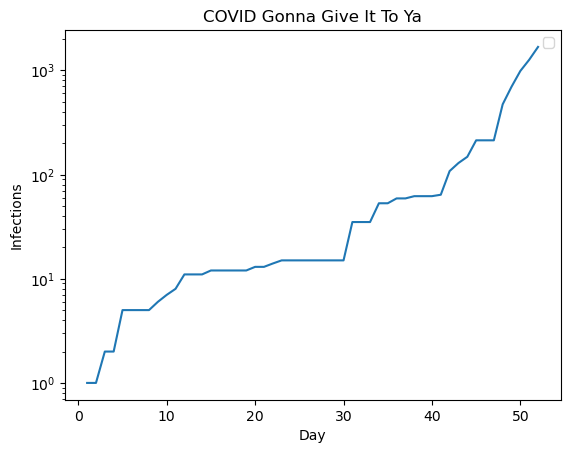

In [138]:
plt.title('COVID Gonna Give It To Ya')
sns.lineplot(data=df, x="Day", y="Infections")
plt.yscale('log')
plt.legend()

#### Test for Exponential

Now the line is kind of straight. The more straight it is, the "better". 

The closer this curve is to a line, the closer the real data is to exponential. Why...

In [139]:
#Generate best fit line
#You don't need to memorize this, we'll do this stuff later when we do scatter plots and regression. 
# the log transformation for Y
y = np.log(df["Infections"])
x = df["Day"]
m,b=np.polyfit(x, y, 1, w=np.sqrt(y))
y_fit=np.exp(m*x+b)
print(m)
print(b)


0.11748262946936426
0.18488346106582226


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


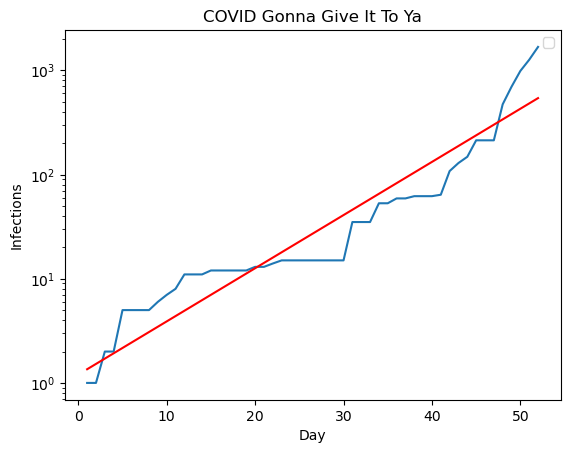

In [140]:
#Show best fit line on graph.
# the red straight line is the analytical distribution
# the blue line is actual empirical data
plt.title('COVID Gonna Give It To Ya')
sns.lineplot(data=df, x="Day", y="Infections")
sns.lineplot(x=x, y=y_fit, color="red")
plt.yscale('log')
plt.legend()

Why? After the log transformation a straight line that we generated is a "perfect" exponential function - if we undid the log operation, we'd get that as a result. Our transformed data is a drunken stumble version of an exponential distribution (we know this, because we looked at the math above). The closer the emperical data is to the analytical version, the better a fit that analytical version is, just like the normal data vs a prbability plot. 

為什麼？ 在對數轉換之後，我們生成的一條直線是一個“完美”的指數函數——如果我們取消對數操作，我們就會得到它。 

我們轉換後的數據是指數分佈的醉酒版本（我們知道這一點，因為我們看過上面的數學）。 

經驗數據越接近分析版本，分析版本越適合，就像正常數據與概率圖一樣。

#### Our Data and its Analytical Match

What does all this mean? These general points are important! 

One of the uses of analytical models is to give us a simplied model that we can use to examine real data. 
The closer the data is to the model, the better it "fits". This allows us to utilize all that we know about that distribution to add to what we know from our data - if we know that our data follows a certain distribution (determined by matching our data to an analytical distribution) with certain parameters (measured from our emperical data), we can use this to do things like make predictions and generalizations based on a small(ish) emperical sample. We "know" the data will be distributed in a certain way, so all we need to do is adapt that to our specific inputs. 

Matching the distribution seen in our data to a known analytical distribution is a very important concept, especially as we move on to inferential (using stats to make predictions) statistics going forward. This is also why we can generalize things like polling from a small sample. We know, mathmatically, what to expect from an analytical distribution, so if we can "fit" our data to one of these distributions, we can use all that knowledge to draw conclusions on our data. 

Things like the log scale for exponential functions give us a way to look for fit. There's visual and analytical methods. 

分析模型的用途之一是為我們提供可用於檢查真實數據的簡化模型。

數據越接近模型，它就越“適合”。 這使我們能夠利用我們所知道的關於該分佈的所有信息來增加我們從數據中所知道的信息——

如果我們知道數據遵循某種分佈（通過將數據與分析分佈相匹配來確定）和某些參數（從我們的測量中測量） 經驗數據），我們可以使用它來做一些事情，

比如基於一個小的（ish）經驗樣本進行預測和概括。 我們“知道”數據將以某種方式分佈，因此我們需要做的就是根據我們的特定輸入進行調整。


將我們數據中看到的分佈與已知的分析分佈相匹配是一個非常重要的概念，尤其是當我們繼續進行推理（使用統計數據進行預測）統計時。 

這也是為什麼我們可以概括一些事情，比如從一個小樣本中進行輪詢。 

從數學上講，我們知道從分析分佈中可以得到什麼，所以如果我們可以將我們的數據“擬合”到這些分佈之一，我們就可以使用所有這些知識來對我們的數據得出結論。

指數函數的對數刻度之類的東西為我們提供了一種尋找合適的方法。 有視覺和分析方法。

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


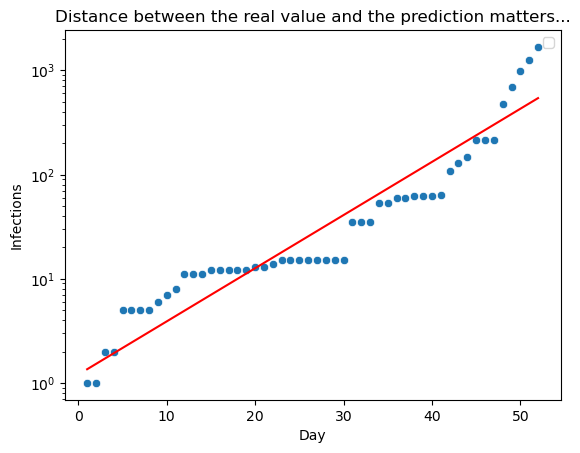

In [141]:
#Show best fit line on graph.
plt.title('Distance between the real value and the prediction matters...')
sns.scatterplot(data=df, x="Day", y="Infections")
sns.lineplot(x=x, y=y_fit, color="red")
plt.yscale('log')
plt.legend()

## Exercise - Part 2

Plot the log-transformed version of the plot of the data. 

In [142]:
#Generate best fit line
#You don't need to memorize this, we'll do this stuff later when we do scatter plots and regression. 
ex_y = np.log(ex["Value"])
ex_x = ex["Index"]
ex_m, ex_b = np.polyfit(ex_x, ex_y, 1, w=np.sqrt(ex_y))
ex_fit=np.exp(ex_m * ex_x + ex_b)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


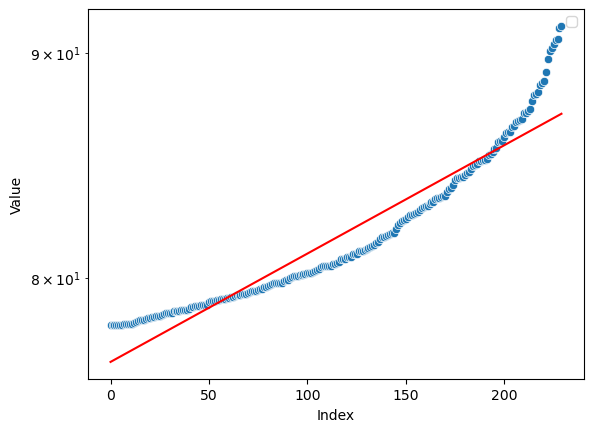

In [143]:
# Plot
sns.scatterplot(data=ex, x="Index", y="Value")
sns.lineplot(x=ex_x, y=ex_fit, color="red")
plt.yscale('log')
plt.legend()

##### Exercise Findings

It looks like a good match early, then splits a bit at the end. 

### Analytical Predictions

We can "undo" the log part to see our new predictions! They aren't awesome, but we just started. 

The closer of a match that we can get of an analytical distribution to our emperical distribution, the more that analytical distribution will help us make generalizations. There are a few things we can do to improve this match:
<ul>
<li> Increase sample size - if possible, adding more sample data will allow us to better and more accurately match to an analytical distribution. 
<li> Use transformations - things like logs to make skewed normal distributions normal can help manipulate data to more closely match an analytical distribution. 
<li> Choose different distributions - we will look at a few, there are many. While the bulk of scenarios can be captured with a handful of distributions (normal, lognormal, exponential, pareto, etc...), there are a bunch that may fit your data. 
<li> Balance fit to the model - this is a concept that we'll revisit heavily when doing machine learning. In short, we want an analytical model that follows the same pattern as our emperical distribution - but is not <b>so</b> tailored to the data that it does things like follow singular outliers to the detriment of the overall fit. 
</ul>

### 分析預測

我們可以“撤消”日誌部分以查看我們的新預測！ 他們不是很棒，但我們才剛剛開始。

分析分佈與我們的經驗分佈越接近，分析分佈就越能幫助我們進行概括。 我們可以做一些事情來改善這場比賽：
<ul>
<li> 增加樣本量 - 如果可能，添加更多樣本數據將使我們能夠更好、更準確地匹配分析分佈。
<li> 使用轉換 - 諸如使偏斜正態分佈變為正態的日誌之類的東西可以幫助操縱數據以更接近地匹配分析分佈。
<li> 選擇不同的發行版——我們會看一些，有很多。 

雖然可以使用少數幾個分佈（正態分佈、對數正態分佈、指數分佈、帕累托分佈等）捕獲大部分場景，但有很多場景可能適合您的數據。

<li> 模型的平衡擬合 - 這是我們在進行機器學習時將重新審視的概念。 

簡而言之，我們想要一個遵循與我們的經驗分佈相同模式的分析模型 - 但不是<b>如此</b>針對數據量身定制的，以至於它會做一些像遵循奇異異常值這樣會損害整體擬合的事情。
</ul>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


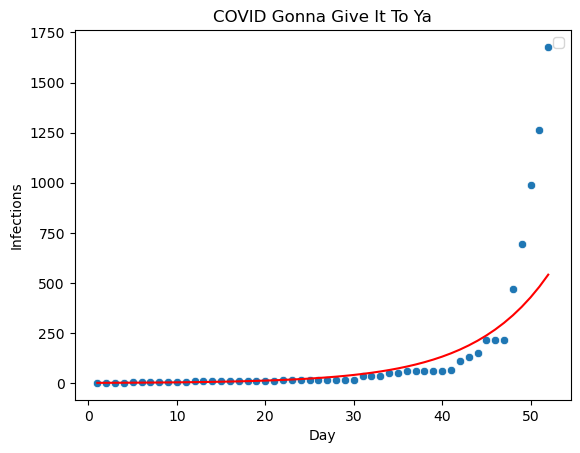

In [144]:
plt.title('Distance between the real value and the prediction matters...')
sns.scatterplot(data=df, x="Day", y="Infections")
sns.lineplot(x=x, y=y_fit, color="red")
plt.title('COVID Gonna Give It To Ya')
plt.legend()

## Generate Exponential Dataset - You Can Ignore From Here Down

<AxesSubplot:ylabel='Proportion'>

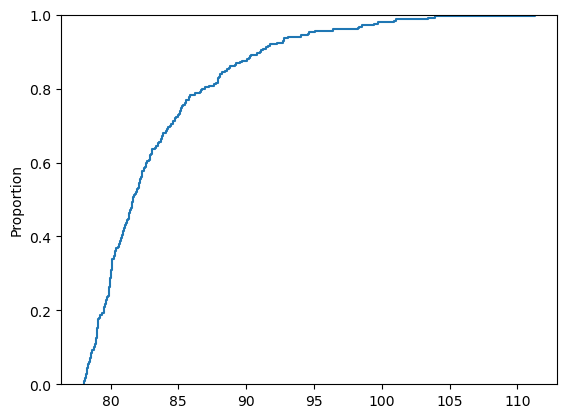

In [145]:
a = scipy.stats.expon.rvs(size=250, scale=5, loc=78)
a.sort()
sns.ecdfplot(a)

In [146]:
b = np.linspace(0,249,250)
#b

In [147]:
c = np.random.rand(1,250)*3
#c[0]

In [148]:
d = a + c[0]
d.sort()
#print(d)

In [149]:
tmp_df = pd.DataFrame([b,a]).T
tmp_df.columns = ["Index", "Value"]
tmp_df.sort_values(ascending=True, inplace=True, by="Value")
tmp_df.tail()

,Index,Value
245,245.0,100.916270
246,246.0,101.033993
247,247.0,103.382032
248,248.0,103.957632
249,249.0,111.293053


In [150]:
tmp_df.head(230).to_csv("data/expon.csv", index=False)